In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from tqdm import tqdm
from datetime import datetime
import json

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [15, 8]


In [2]:
train = pd.read_csv('../data/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [3]:
test = pd.read_csv('../data/test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
id                       4398 non-null int64
belongs_to_collection    877 non-null object
budget                   4398 non-null int64
genres                   4382 non-null object
homepage                 1420 non-null object
imdb_id                  4398 non-null object
original_language        4398 non-null object
original_title           4398 non-null object
overview                 4384 non-null object
popularity               4398 non-null float64
poster_path              4397 non-null object
production_companies     4140 non-null object
production_countries     4296 non-null object
release_date             4397 non-null object
runtime                  4394 non-null float64
spoken_languages         4356 non-null object
status                   4396 non-null object
tagline                  3535 non-null object
title                    4395 non-null object
Keywords            

#### Thoughts on variables:
- A big **budget** does not necessarily leads to a big revenue
- a **language** might not influence the revenue, but the **number of spoken languages** might do. (check if the number of spoken languages influences the revenue)
- **popularity** is a floating varible; it does not seem to influence the revenue so I decided to drop it



#### Unused columns for modeling:
- id
- imdb_id
- original_title
- (overview0)
- popularity (what is it exactly?)
- poster_path

In [113]:
# drop these columns, for now
train = train.drop(columns=['id', 'popularity', 'homepage', 'poster_path', 'status', 'original_title', 'overview', 'tagline'])
test = test.drop(columns=['id', 'popularity', 'homepage', 'poster_path', 'status', 'original_title', 'overview', 'tagline'])

# save imdb_id, title for now

In [114]:
train['budget'] = train['budget'].replace(0, np.nan)
test['budget'] = test['budget'].replace(0, np.nan)
train['revenue'] = train['revenue'].replace(0, np.nan)

## EDA

In [115]:
train.head(100)

,belongs_to_collection,budget,genres,imdb_id,original_language,production_companies,production_countries,release_date,runtime,spoken_languages,title,Keywords,cast,crew,revenue,earn_money
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000.0,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,False
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,True
2,NaN,3300000.0,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,True
3,NaN,1200000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",tt1821480,hi,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,True
4,NaN,NaN,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt1380152,ko,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,True
5,NaN,8000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",tt0093743,en,NaN,NaN,8/6/87,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638,False
6,NaN,14000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",tt0431021,en,"[{'name': 'Ghost House Pictures', 'id': 768}, ...","[{'iso_3166_1': 'US', 'name': 'United States o...",8/30/12,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The Possession,NaN,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075,True
7,NaN,NaN,"[{'id': 99, 'name': 'Documentary'}]",tt0391024,en,NaN,NaN,1/15/04,84.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511,True
8,"[{'id': 256377, 'name': 'The Muppet Collection...",NaN,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",tt0117110,en,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/16/96,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Muppet Treasure Island,"[{'id': 2041, 'name': 'island'}, {'id': 4418, ...","[{'cast_id': 1, 'character': 'Long John Silver...","[{'credit_id': '52fe43c89251416c7501deb3', 'de...",34327391,True
9,NaN,6000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",tt0310281,en,"[{'name': 'Castle Rock Entertainment', 'id': 97}]","[{'iso_3166_1': 'US', 'name': 'United States o...",4/16/03,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",A Mighty Wind,"[{'id': 11800, 'name': 'mockument

In [118]:
train.describe()

,budget,runtime,revenue
count,2.188000e+03,2998.000000,3.000000e+03
mean,3.089305e+07,107.856571,6.672585e+07
std,4.026785e+07,22.086434,1.375323e+08
min,1.000000e+00,0.000000,1.000000e+00
25%,5.150000e+06,94.000000,2.379808e+06
50%,1.600000e+07,104.000000,1.680707e+07
75%,4.000000e+07,118.000000,6.891920e+07
max,3.800000e+08,338.000000,1.519558e+09


In [99]:
train.isna().sum()

id                          0
belongs_to_collection    2396
budget                    812
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
earn_money                  0
dtype: int64

In [120]:
test.isna().sum()

belongs_to_collection    3521
budget                   1211
genres                     16
imdb_id                     0
original_language           0
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64

In [ ]:
# introduce new variable: earn_money, try to figure out what cause a movie to lose revenue
train['earn_money'] = train['budget'] < train['revenue']

### Numerical Variables:

In [51]:
train[['budget', 'popularity', 'runtime', 'revenue']].corr()

,budget,popularity,runtime,revenue
budget,1.000000,0.342356,0.238373,0.752965
popularity,0.342356,1.000000,0.133690,0.461460
runtime,0.238373,0.133690,1.000000,0.216380
revenue,0.752965,0.461460,0.216380,1.000000


We can see that the correlation between revenue and budget is most obvious.

#### Budget:

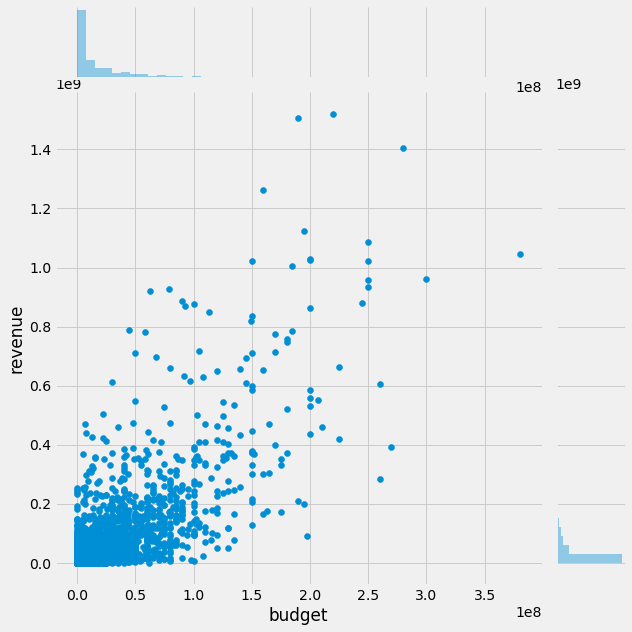

In [59]:
sns.jointplot(x=train['budget'], y=train['revenue'], height=9, ratio=6)

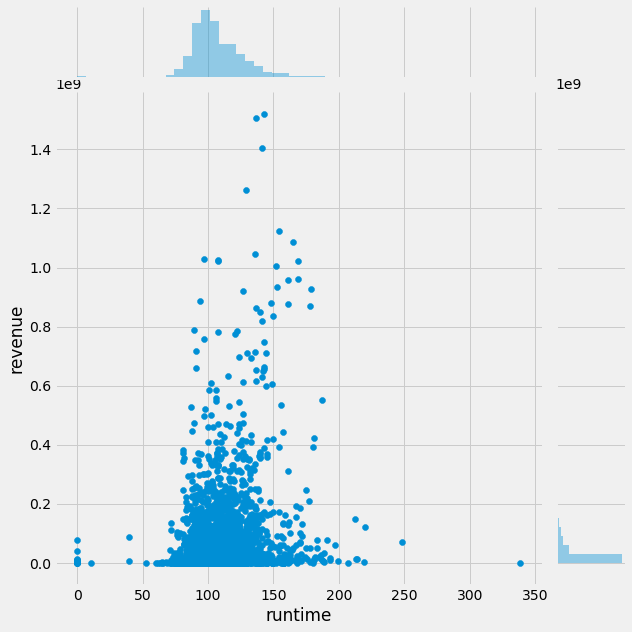

In [119]:
sns.jointplot(x=train['runtime'], y=train['revenue'], height=9, ratio=6)

### Categorical Variables:

#### Original Language: